# ADNI Clinical Data Exploration

## Data Source
This notebook processes clinical data from the **Alzheimer's Disease Neuroimaging Initiative (ADNI)** dataset.

The clinical data file `ADNI_Training.csv` is a comma-delimited text file containing baseline and 24-month clinical assessments with cognitive and demographic covariates for each participant.

## Variable Definitions

| Variable | Description |
|----------|-------------|
| **RID** | Participant roster ID |
| **PTID** | Participant ID |
| **VISCODE** | Visit code (e.g., "bl" for baseline, "m24" for 24-month) |
| **EXAMDATE** | Examination date |
| **DX.bl** | Diagnosis at baseline (CN, EMCI, LMCI, AD) |
| **AGE** | Age at baseline (years) |
| **PTGENDER** | Sex (Male/Female) |
| **PTEDUCAT** | Years of education |
| **APOE4** | Number of ApoE4 alleles (0, 1, or 2) |
| **MMSE** | Mini-Mental State Examination score at baseline |
| **APOE Genotype** | APOE allele 1 and allele 2 genotypes (e.g., 3,4) |

## Processing Steps
1. **Extract baseline visits only** - Filter to "bl" visit code
2. **Select diagnostic classes** - CN (Cognitively Normal), EMCI (Early MCI), AD (Alzheimer's Disease)
3. **Handle missing values** - Remove rows with missing data
4. **Encode categorical variables** - Convert gender to binary (Male=1, Female=0)
5. **Prepare features and labels** - Create feature matrix X and target vector y

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")

In [4]:
#DATA_DIR = Path("../sample_data")
#clinical_path = "/content/sample_data/ADNI_Training_Q1_APOE_July22.2014.csv"

#DATA_DIR = Path("../data/raw")
clinical_path = '/Users/Home/neuroai-adni-classification/neuroai-adni-classification/data/raw/ADNI_Training.csv'


df = pd.read_csv(clinical_path)

print("Shape:", df.shape)
df.head()


Shape: (1534, 11)


,RID,PTID,VISCODE,EXAMDATE,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,APOE Genotype
0,5,011_S_0005,bl,9/7/05,CN,73.7,Male,16,0,29,"3,3"
1,5,011_S_0005,m24,9/7/07,CN,73.7,Male,16,0,29,"3,3"
2,6,100_S_0006,bl,11/29/05,LMCI,80.4,Female,13,0,25,"3,3"
3,6,100_S_0006,m24,11/8/07,LMCI,80.4,Female,13,0,26,"3,3"
4,30,023_S_0030,bl,10/20/05,LMCI,80.0,Female,19,0,29,"3,3"


In [5]:
df.columns

Index(['RID', 'PTID', 'VISCODE', 'EXAMDATE', 'DX.bl', 'AGE', 'PTGENDER',
       'PTEDUCAT', 'APOE4', 'MMSE', 'APOE Genotype'],
      dtype='object')

In [16]:
# Verify expected columns exist
expected_cols = ['RID', 'VISCODE', 'EXAMDATE', 'DX.bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'MMSE', 'APOE Genotype']
missing_cols = [col for col in expected_cols if col not in df.columns]
if missing_cols:
    print(f"⚠️ Missing columns: {missing_cols}")
else:
    print("✓ All expected ADNI columns present")

# Display basic data info
print(f"\nDataset shape: {df.shape}")
print(f"\nVisit codes: {df['VISCODE'].unique()}")
print(f"\nDiagnosis categories: {df['DX.bl'].unique()}")

✓ All expected ADNI columns present

Dataset shape: (1534, 11)

Visit codes: ['bl' 'm24']

Diagnosis categories: ['CN' 'LMCI' 'AD' 'EMCI']


In [6]:
cols = [
    'RID',
    'VISCODE',
    'EXAMDATE',
    'DX.bl',
    'AGE',
    'PTGENDER',
    'PTEDUCAT',
    'APOE4',
    'MMSE',
    'APOE Genotype'
]

df_sub = df[cols].copy()
df_sub.head()

,RID,VISCODE,EXAMDATE,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,APOE Genotype
0,5,bl,9/7/05,CN,73.7,Male,16,0,29,"3,3"
1,5,m24,9/7/07,CN,73.7,Male,16,0,29,"3,3"
2,6,bl,11/29/05,LMCI,80.4,Female,13,0,25,"3,3"
3,6,m24,11/8/07,LMCI,80.4,Female,13,0,26,"3,3"
4,30,bl,10/20/05,LMCI,80.0,Female,19,0,29,"3,3"


In [7]:
df_sub["DX.bl"].value_counts()


DX.bl
LMCI    546
CN      482
EMCI    260
AD      246
Name: count, dtype: int64

In [8]:
# Keep only baseline visits
df_base = df_sub[df_sub["VISCODE"] == "bl"].copy()

# Filter to CN / EMCI / AD
df_base = df_base[df_base["DX.bl"].isin(["CN", "EMCI", "AD"])]

df_base["DX.bl"].value_counts()

DX.bl
CN      241
EMCI    130
AD      123
Name: count, dtype: int64

In [17]:
# Verification: Check data aligns with ADNI specifications
print("=== Data Verification ===")
print(f"\nBaseline records: {df_base.shape[0]}")
print(f"Diagnostic classes: {df_base['DX.bl'].value_counts().to_dict()}")
print(f"\nAge range: {df_base['AGE'].min():.1f} - {df_base['AGE'].max():.1f} years")
print(f"Education range: {df_base['PTEDUCAT'].min():.0f} - {df_base['PTEDUCAT'].max():.0f} years")
print(f"MMSE range: {df_base['MMSE'].min():.0f} - {df_base['MMSE'].max():.0f}")
print(f"APOE4 alleles: {sorted(df_base['APOE4'].dropna().unique())}")
print(f"Gender distribution: {df_base['PTGENDER'].value_counts().to_dict()}")

=== Data Verification ===

Baseline records: 494
Diagnostic classes: {'CN': 241, 'EMCI': 130, 'AD': 123}

Age range: 55.9 - 90.9 years
Education range: 6 - 20 years
MMSE range: 20 - 30
APOE4 alleles: [np.int64(0), np.int64(1), np.int64(2)]
Gender distribution: {'Male': 276, 'Female': 218}


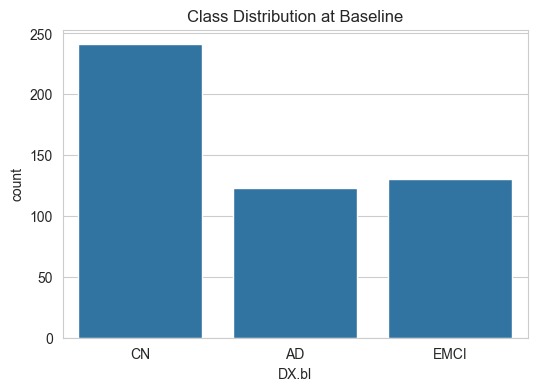

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_base, x="DX.bl")
plt.title("Class Distribution at Baseline")
plt.show()


Before: (494, 10)
After: (494, 10)


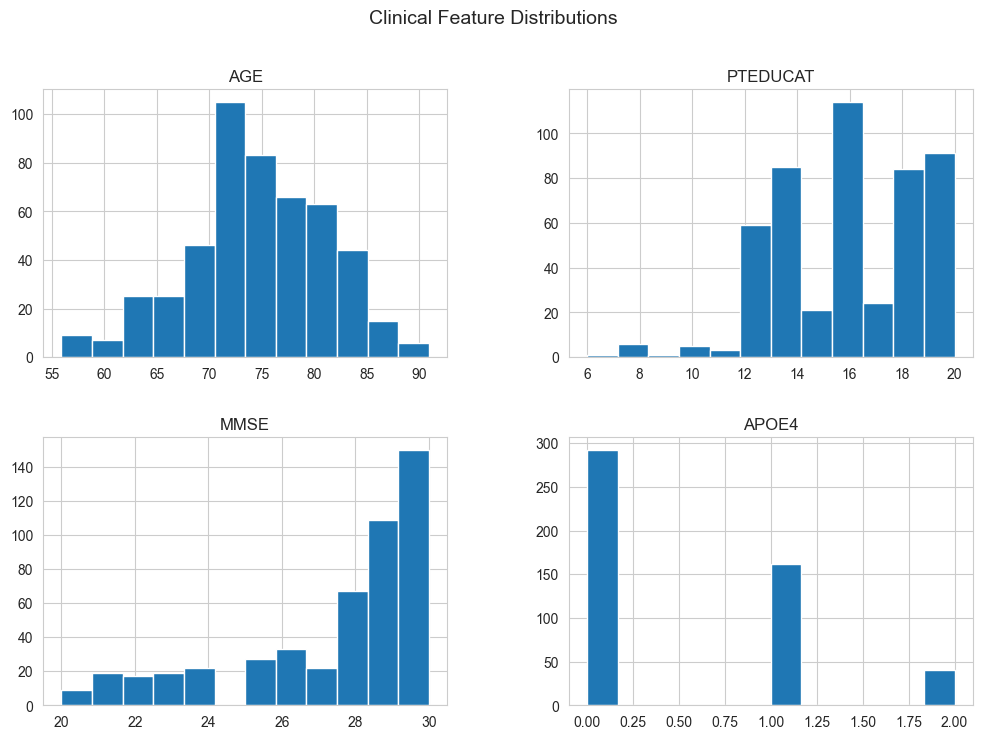

In [10]:
num_cols = ['AGE', 'PTEDUCAT', 'MMSE', 'APOE4']
df_clean = df_base.dropna().copy()

print("Before:", df_base.shape)
print("After:", df_clean.shape)
df_clean[num_cols].hist(bins=12, figsize=(12,8))
plt.suptitle("Clinical Feature Distributions", fontsize=14)
plt.show()

In [11]:
df_clean["GENDER"] = df_clean["PTGENDER"].map({"Male": 1, "Female": 0})

In [12]:
features = ["AGE", "GENDER", "PTEDUCAT", "MMSE", "APOE4", "APOE Genotype"]
X = df_clean[features]
y = df_clean["DX.bl"]

print(X.shape, y.shape)
df_clean.head()

(494, 6) (494,)


,RID,VISCODE,EXAMDATE,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,APOE Genotype,GENDER
0,5,bl,9/7/05,CN,73.7,Male,16,0,29,"3,3",1
6,31,bl,10/24/05,CN,77.7,Female,18,0,30,"3,3",0
10,35,bl,11/8/05,CN,76.9,Male,18,0,30,"3,3",1
14,43,bl,2/3/06,CN,76.2,Male,16,0,29,"2,3",1
16,47,bl,12/15/05,CN,84.7,Male,20,0,30,"2,3",1


In [18]:
# Final verification: Processed data integrity
print("=== Final Dataset Verification ===")
print(f"\nFinal sample count: {len(df_clean)}")
print(f"Diagnostic distribution:\n{y.value_counts()}")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Feature columns: {list(X.columns)}")

# Verify no missing values
missing_count = df_clean[features].isnull().sum().sum()
print(f"\n✓ Missing values in features: {missing_count}")

# Check value ranges align with ADNI specs
print(f"\nValue ranges:")
print(f"  AGE: {X['AGE'].min():.1f} - {X['AGE'].max():.1f} years")
print(f"  MMSE: {X['MMSE'].min():.0f} - {X['MMSE'].max():.0f}")
print(f"  APOE4: {sorted(X['APOE4'].unique())}")
print(f"  GENDER (0=Female, 1=Male): {X['GENDER'].unique()}")
print(f"\n✓ Data processing complete and verified against ADNI specifications")

=== Final Dataset Verification ===

Final sample count: 494
Diagnostic distribution:
DX.bl
CN      241
EMCI    130
AD      123
Name: count, dtype: int64

Feature matrix shape: (494, 6)
Feature columns: ['AGE', 'GENDER', 'PTEDUCAT', 'MMSE', 'APOE4', 'APOE Genotype']

✓ Missing values in features: 0

Value ranges:
  AGE: 55.9 - 90.9 years
  MMSE: 20 - 30
  APOE4: [np.int64(0), np.int64(1), np.int64(2)]
  GENDER (0=Female, 1=Male): [1 0]

✓ Data processing complete and verified against ADNI specifications


In [13]:
PROCESSED_DIR = Path("../data/processed")
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

out_path = PROCESSED_DIR / "adni_baseline_tabular.csv"
df_clean.to_csv(out_path, index=False)

print(f"Saved to: {out_path}")

Saved to: ../data/processed/adni_baseline_tabular.csv
